## Знакомство с библиотеками для анализа данных. Pandas

Результат лабораторной работы − отчет в формате ноутбука Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторные работы "NumPy" и "Pandas" направлены на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач (да, алгебры и геометрии тут почти нет). В данных заданиях разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью заданий является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в заданиях функции.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо добавить ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировками
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

###  Правила сдачи

Работу необходимо сдавать, загрузив в свой приватный репозиторий и сообщив об этом в телеграм @xrzvs (или просто открыв доступ к ноутбуку в Google Colab; более подробную информацию смотрите в README.md). 

### Аналитика данных с [Pandas](https://pandas.pydata.org/) 

Загрузите таблицу с данными из [```articles.csv```](https://disk.yandex.ru/i/m4rxX9t3MGMrnQ). Удалите записи, в которых присутствуют пропуски.

**(0.5 балла) Задача 1.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [1]:
import pandas as pd
df = pd.read_csv('articles.xls')
#Читаем

In [2]:
len(df.publication.unique()) #5 издательств
#Считаем уникальные

5

In [3]:
len(df[(df.date >= '2016-06-01') & (df.date <= '2016-12-31')]) #19408 cтатей
#Применяем 2 условия

19408

In [4]:
#распределение по годам
#Берем определенного автора, группируем по годам, находим количество записей и делим на кол-во всех записек автора
df[df.author == 'Tom Ciccotta'].groupby(['year'])['content'].count()/len(df[df.author == 'Tom Ciccotta'])

year
2016    0.484375
2017    0.515625
Name: content, dtype: float64

In [5]:
#Задание прописано недостаточно точно: непонятно, 
#нужно проанализировать года вместе или по отдельности
df.groupby('month').count().idxmax() #Если первый случай, то 1 месяц
df.groupby(['year', 'month']).count().idxmax() #Во втором случае тоже первый
#Группируем по месяцу, берем количество и находим максимальный элемент

id             (2017, 1)
title          (2017, 1)
publication    (2017, 1)
author         (2017, 1)
date           (2017, 1)
content        (2017, 1)
dtype: object

In [6]:
df[(df['author'] == 'John Hayward') & (df['year'] == 2016)].content.head(3)
# Снова 2 условия, берем3 первые записи в 2016 году

9843     Stephen K. Bannon, former Breitbart News execu...
13467    President Barack Obama’s final weeks in office...
15495    MarketWatch reports that the U. S. trade defic...
Name: content, dtype: object

** Работа со строками в датафрейме. **

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 2.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [7]:
df[df.author.str.contains('Faith') == True].author.unique()
#Просто условие с функции питона

array([' Faith Haleh Robinson', 'Faith Karimi', 'Faith Haleh Robinson',
       'Faith Karimi,', 'Faith Karimi ', 'Faith Karimi, ',
       ' Faith Karimi', ' Faith Karimi '], dtype=object)

**(1 балл) Задача 3. **

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [8]:
import re
#re.sub(r'\s+', ' ', df['author'])
#df['author'] = df['author'].apply(str.split).applymap(" ".join)
df['author'] = df['author'].dropna().apply(lambda x: " ".join(x.lower().split()))
df['author'] = df['author'].replace(r'[,\"\']','', regex=True)
df['content'] = df['content'].dropna().apply(lambda x: " ".join(x.lower().split()))
df['content'] = df['content'].replace(r'[,\"\']','', regex=True)
# Регулярныые выражения
# Первое нужно для того, чтобы привести всё к нижнему регистру и убрать лишние пробелы
# Второе убирает знаки препинания

**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 4.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [9]:
df.groupby(['author', 'year']).publication.count().\
                               reset_index(name='count').\
                               sort_values(['count'], ascending=False).\
                               head(20)
# Группируем, берем количество, сортируем по количеству записей и берем первые 20 строк

,author,year,count
682,breitbart news,2016,1317
3660,pam key,2016,820
865,charlie spiering,2016,660
180,alex swoyer,2016,584
1081,daniel nussbaum,2016,532
516,awr hawkins,2016,525
2228,john hayward,2016,521
2105,jerome hudson,2016,482
3661,pam key,2017,457
1804,ian hanchett,2016,429


**(1 балл) Задача 5.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

*Hint*. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [10]:
df.groupby(['publication', 'date']).content.count()
# Просто изучаю данные

publication     date      
Atlantic        2016-12-30    19
                2016-12-31     4
                2017-01-01     3
                2017-01-02     2
                2017-01-03    27
                              ..
New York Times  2017-06-08    11
                2017-06-11     1
                2017-06-15     2
                2017-06-16     1
                2017-06-19     6
Name: content, Length: 2301, dtype: int64

In [11]:
def get_before(row):
    return len(df[(df.date <= row.date) & (df.publication == row.publication)])
df['before'] = df.apply(get_before,axis=1)
#Создаем функцию, вычисляющую количество записей, сделанных ранее
#Да, медленно, но работает
# Ответ находится в колонке before для каждой строки датафрейма

In [22]:
df

,id,title,publication,author,date,year,month,content,before
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,carl hulse,2016-12-31,2016,12,washington — congressional republicans have a ...,3632
1,17284,Rift Between Officers and Residents as Killing...,New York Times,benjamin mueller and al baker,2017-06-19,2017,6,after the bullet shells get counted the blood ...,7803
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,margalit fox,2017-01-06,2017,1,when walt disney’s “bambi” opened in 1942 crit...,3763
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,william mcdonald,2017-04-10,2017,4,death may be the great equalizer but it isn’t ...,7144
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,choe sang-hun,2017-01-02,2017,1,seoul south korea — north korea’s leader kim s...,3652
...,...,...,...,...,...,...,...,...,...
49995,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,robinson meyer,2017-01-11,2017,1,as chairman and ceo of exxonmobil rex tillerso...,171
49996,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,amy zegart,2017-01-11,2017,1,i’ve spent nearly 20 years looking at intellig...,171
49997,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,jeremy venook,2017-01-11,2017,1,donald trump will not be taking necessary step...,171
49998,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,emily deruy,2017-01-11,2017,1,dozens of colleges could be forced to close in...,171


### [Разреженные матрицы](https://ru.wikipedia.org/wiki/Разреженная_матрица)



Вот здесь http://docs.scipy.org/doc/scipy/reference/sparse.html можно посмотреть, как различные форматы разреженных матриц реализованы в библиотеке `scipy`.

Вот здесь https://www.cise.ufl.edu/research/sparse/matrices/index.html выложено много разреженных матриц из разнообразных приложений. Что особенно приятно, сайт предоставляет удобный клиент для скачивания, в котором доступен предпросмотр и данные о том, являются ли матрицы симметричными или положительно определёнными.

Торговая сеть предоставила вам данные о покупках своих клиентов, представляющие собою 
таблицу со столбцами 
* Номер записи
* *InvoiceNo* - номер чека
* *StockCode* - код товара
* *Description* - название товара

Чтобы понять, какие товары покупают вместе, вы решили построить (разреженную) матрицу, строки и столбцы которой соответствуют различным товарам, а в клетке с "номером" $(g_1, g_2)$ стоит число $c(g_1 \& g_2)$ --- количество чеков, содержащих оба товара. 

**(1 балл) Задача 6.** Ниже приведён код, который вам нужно дополнить, дописав функцию ``CreateMatrix``, создающую из структуры pandas.DataFrame разреженную матрицу. Ваша реализация должна удовлетворять следующим свойствам:
* матрица должна создаваться эффективно и по возможности с минимальным числом циклов;
* итоговая матрица должна позволять быстро отвечать на следующие вопросы:
  - сколько всего было куплено товаров данного типа?
  - какие пары товаров покупались вместе чаще всего?
  - какие товары чаще всего покупались вместе с данным товаром?

Пожалуйста, объясните, почему вы выбрали именно ту, а не иную архитектуру.

Загрузим данные:

In [5]:
import pandas as pd
receipts = pd.read_csv('Online Retail Short.csv', sep=';')

,Unnamed: 0,InvoiceNo,StockCode,Description
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,1,536365,71053,WHITE METAL LANTERN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


Распечатаем первые несколько строк, чтобы осознать структуру данных:

In [15]:
receipts.head()

,Unnamed: 0,InvoiceNo,StockCode,Description
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,1,536365,71053,WHITE METAL LANTERN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


А теперь та самая функция. Вам могут пригодиться следующие конструкции:

* ``for name, group in data.groupby('InvoiceNo')`` --- цикл, в котором ``name`` будут различными значениями ``InvoiceNo``, а ``group`` --- кусками нашего ``DataFrame`` с заданным значением ``InvoiceNo``.
* ``for g1, g2 in itertools.combinations(list(group['StockCode']), 2)`` --- цикл, пробегающий пары различных элементов (сочетания по 2) из списка товаров из заданной группы.

In [13]:
import scipy.sparse as sps
import itertools

# Зачем бы нужны следующие две строки?)
idx2code = sorted(set(receipts['StockCode']))
code2idx = {code : i for i, code in enumerate(idx2code)}

def CreateMatrix(data):
    spmatrix = sps.lil_matrix(len(code2idx), len(code2idx))
    
    '''
    Ввод
    -----
    receipts: структура pandas.DataFrame
    
    Вывод
    ------
    res: разреженная матрица
    '''
    # Your code here
    raise NotImplementedError()
# CreateMatrix(receipts)
for name, group in receipts.groupby('InvoiceNo'):
    print(name, group)


536365    Unnamed: 0 InvoiceNo StockCode                          Description
0           0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER
1           1    536365     71053                  WHITE METAL LANTERN
2           2    536365    84406B       CREAM CUPID HEARTS COAT HANGER
3           3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE
4           4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.
5           5    536365     22752         SET 7 BABUSHKA NESTING BOXES
6           6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER
536366    Unnamed: 0 InvoiceNo StockCode                Description
7           7    536366     22633     HAND WARMER UNION JACK
8           8    536366     22632  HAND WARMER RED POLKA DOT
536368     Unnamed: 0 InvoiceNo StockCode                     Description
9           21    536368     22960        JAM MAKING SET WITH JARS
10          22    536368     22913     RED COAT RACK PARIS FASHION
11          23    536368   

KeyboardInterrupt: 

In [5]:
code2idx

{'10002': 0,
 '10080': 1,
 '10123C': 2,
 '10123G': 3,
 '10125': 4,
 '10133': 5,
 '10134': 6,
 '10135': 7,
 '11001': 8,
 '15030': 9,
 '15034': 10,
 '15036': 11,
 '15039': 12,
 '15044A': 13,
 '15044B': 14,
 '15044C': 15,
 '15044D': 16,
 '15056BL': 17,
 '15056N': 18,
 '15056P': 19,
 '15056n': 20,
 '15058A': 21,
 '15058B': 22,
 '15058C': 23,
 '15060B': 24,
 '16008': 25,
 '16010': 26,
 '16011': 27,
 '16012': 28,
 '16014': 29,
 '16015': 30,
 '16016': 31,
 '16020C': 32,
 '16033': 33,
 '16043': 34,
 '16045': 35,
 '16046': 36,
 '16048': 37,
 '16049': 38,
 '16052': 39,
 '16053': 40,
 '16054': 41,
 '16151A': 42,
 '16156S': 43,
 '16161G': 44,
 '16161P': 45,
 '16161U': 46,
 '16162L': 47,
 '16162M': 48,
 '16168M': 49,
 '16169E': 50,
 '16169K': 51,
 '16169M': 52,
 '16169P': 53,
 '16202B': 54,
 '16207A': 55,
 '16207B': 56,
 '16218': 57,
 '16219': 58,
 '16225': 59,
 '16235': 60,
 '16236': 61,
 '16237': 62,
 '16238': 63,
 '16244B': 64,
 '16248B': 65,
 '16254': 66,
 '16258A': 67,
 '16259': 68,
 '17003': 

**(1 балл) Задача 7.** C помощью созданной вами матрицы ответьте на несколько вопросов:

1) Какая пара товаров была куплена вместе наибольшее число раз? Пожалуйста, в качестве ответа укажите не `id`, а названия из столбца ``Descriptions``.

2) Что чаще всего покупали вместе с ``KNITTED UNION FLAG HOT WATER BOTTLE``?

В вашем ноутбуке должно быть продемонстрировано, как вы это находите с помощью матрицы!

### Визуализация ([Matplotlib](https://matplotlib.org/stable/index.html))

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**(0.5 балла) Задача 18.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

In [13]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

Text(0, 0.5, 'y')

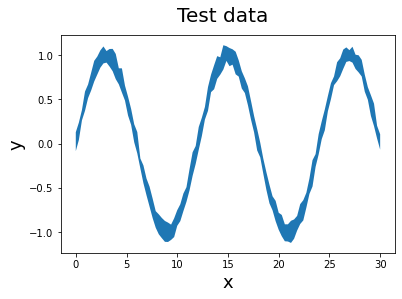

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x, y, e = gen_uncertain_data()
fig = plt.figure()
plt.fill_between(x, y-e, y+e)
fig.suptitle('Test data', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
#Просто fill_between

**(0.5 балла) Задача 19.** Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).


<AxesSubplot:title={'center':'Publishers ditribution'}, ylabel='publication'>

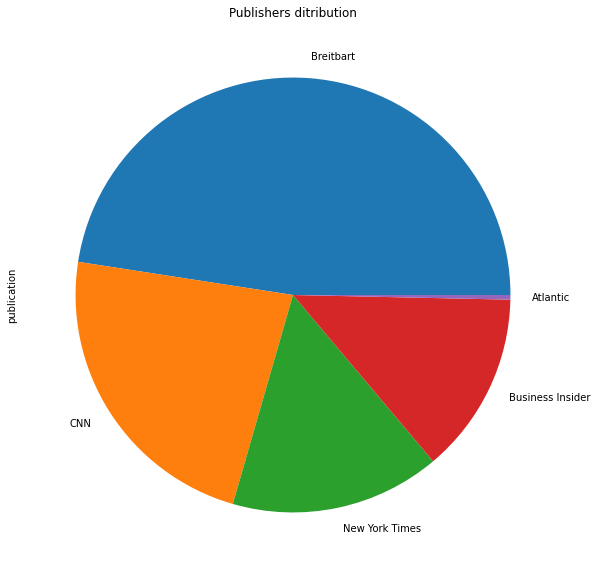

In [19]:
plt.figure(figsize=(10, 10))

df['publication'].value_counts().plot.pie(title='Publishers ditribution')
# Pie для value counts издательств

**(0.5 балла) Задача 20.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

Text(0, 0.5, 'Articles')

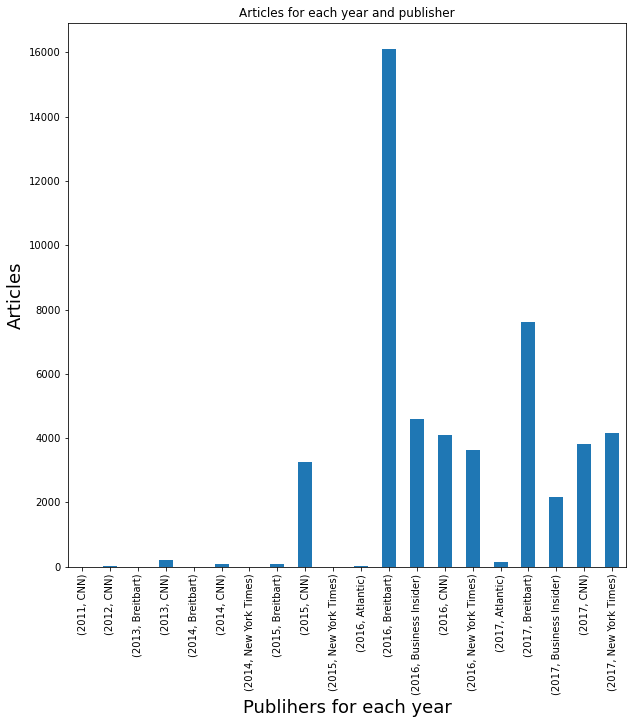

In [20]:
plt.figure(figsize=(10, 10))
df.groupby([df.year, df.publication]).content.count().plot.\
                    bar(title='Articles for each year and publisher')
#больше всего публикаций - Breitbart, 2016 год - это если по конкретным издательствам
plt.xlabel('Publihers for each year', fontsize=18)
plt.ylabel('Articles', fontsize=18)
# Группируем по годам и издательствам, находим количество и строим barplot

**(0.5 балла) Задача 21.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Text(0, 0.5, 'Year')

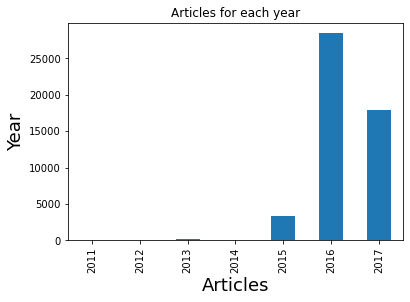

In [21]:
df.groupby(df.year).content.count().plot.bar(title='Articles for each year') 
#В 2016 году в целом было больше всего публикаций
fig.suptitle('Articles for each year', fontsize=20)
plt.xlabel('Articles', fontsize=18)
plt.ylabel('Year', fontsize=18)